In [3]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
DeviceStrategy_GPU()
from module_KTX_KK import * 
from preprocessing_KK import *
from preprocessing_project_KK import *
from description_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from visualization_KK import *


=========== GPU Strategy ===========
Detected GPUs:
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Only 1 GPU detected. Using single-GPU strategy.


======= GPU / CUDA / STATUS ========
Cuda Ready?        True
CUDA Version:      12.5.1
cuDNN Version:     9

TF Version:        2.20.0
Keras Version:     3.13.0
True
Torch Version:       2.8.0+cu128
Torch CUDA Version:  12.8
Torch cuDNN Version: 91002

Torch GPUs Available: 1
Use the GPU: NVIDIA GeForce RTX 4070 Laptop GPU



# Hyperparameters

In [6]:
# Data
FOLDER_GDM, FOLDER_GDS = get_google_drivelocation(gdrive='z', glocation=os.path.join('Research', 'SavedData', 'Subway'))
FOLDER_LOCATION = FOLDER_GDM
FILENAME = 'df_final_v2.csv'
FILE_LOCATION = os.path.join(FOLDER_LOCATION, FILENAME)

# Preprocessing


# Save
SAVE_NAME_PREDSTATTR = 'DescriptiveStatistics_BinaryPredTrain.csv'
SAVE_NAME_PREDSTATTE = 'DescriptiveStatistics_BinaryPredTest.csv'

# Data Preprocessing

In [7]:
# 데이터로딩
df = pd.read_csv(FILE_LOCATION, encoding='utf-8-sig')

In [10]:
df.platform_congestion.describe()

count   2,773,960.0000
mean            0.0843
std             0.2071
min             0.0000
25%             0.0009
50%             0.0094
75%             0.0649
max             3.7824
Name: platform_congestion, dtype: float64

In [2]:
# 전처리
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    print(df.shape)
    
    # 수송인원 높은 역 필터링
    # top_stations = ['홍대입구', '잠실', '강남', '서울역', '신림', '고속터미널', '신도림', '역삼', '선릉', 
    #               '을지로입구', '종각', '가산디지털단지', '서울대입구', '성수', '혜화', '양재', 
    #                '사당', '명동', '압구정', '수유', '연신내', '건대입구', '합정', '신사', '광화문', 
    #                 '시청', '여의도', '경복궁', '안국', '종로3가'] 
    
    top_stations = ['홍대입구', '강남', '서울역', '신림', '잠실', '고속터미널', '선릉', '역삼', '신도림', '을지로입구'] 
    
    df = df[df['역명'].isin(top_stations)].reset_index(drop=True)
    
    selected_columns = df.columns
    
    # 제외할 변수 지정
    excluded_columns = ['역명', '면적', '승강장혼잡도2', '승강장혼잡도1', '날짜', '수송인원수', 'L_total', 'λ_total',
                        'W_total', 'W_환승', 'λ_환승', 'W_승차', 'λ_승차', '승강장_혼잡도', '요일구분', '승하차인원', '일별_승하차인원_합', '호선'
                        ,'시간대별_환승_승객_수','시간대별_승하차_비율']
    
    feature_columns = [col for col in selected_columns if col not in excluded_columns]
    
    # 독립 변수와 종속 변수 분리
    X = df[feature_columns]
    y = df['승강장_혼잡도']
    
    # 학습용과 테스트용 데이터로 분할
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 결과를 딕셔너리 형태로 반환
    data = {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'feature_columns': feature_columns,
        'scaler': scaler,  # 추가
        'df_train': df.iloc[X_train.index],
        'df_test': df.iloc[X_test.index]
    }
    
    return data

# 데이터 전처리
# file_location = os.path.join('/mnt', 'z', '내 드라이브', 'Research', 'SavedData', 'KoSubway', 'df_subway_prep_20241117.csv')
file_location = r'Z:\내 드라이브\Research\SavedData\KoSubway\df_subway_prep_20241117.csv'
df = preprocess_data(file_location)
df_new = pd.concat([df['df_train'], df['df_test']], axis=0)
df_using = pd.concat([df['df_train'][df['feature_columns']], df['df_test'][df['feature_columns']]], axis=0)
print(df_new.shape, df_using.shape)

(1649016, 71)
(553294, 71) (553294, 51)


In [3]:
print(df_new.shape, df_using.shape)

(553294, 71) (553294, 51)


In [18]:
df_stat = df_new.copy()
days = ['요일_Monday', '요일_Tuesday', '요일_Wednesday', '요일_Thursday', '요일_Friday', '요일_Saturday', '요일_Sunday']
df_stat['요일'] = df_stat[days].idxmax(axis=1)
label_map = {day: idx for idx, day in enumerate(days)}
df_stat['요일'] = df_stat['요일'].map(label_map)

In [22]:
df_stat.columns

Index(['날짜', '호선', '역명', '시간', '승차인원', '하차인원', '우대권인원수', '청소년인원수', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '승하차인원', '출입구', '섬식여부',
       '환승노선_개수', '면적', '수송인원수', '환승유입인원수', '승강장혼잡도1', '승강장혼잡도2', '지하철요금',
       '달러 환율', '승하차인원차', '보통휘발유', '자동차용경유', '실업률(%)', '청년실업률(%)',
       '동행지수 순환변동치', '선행지수 순환변동치', '서울_인구(천명)', '서울_인구밀도', '수도권_인구(천명)',
       '수도권_인구밀도', '자동차등록대수(만대)', '기준금리', '한국CPI', 'CPI_대비_지하철요금',
       '요일_Saturday', '요일_Sunday', '공휴일여부', '요일_Monday', '요일_Tuesday',
       '요일_Wednesday', '요일_Thursday', '요일_Friday', '상선 혼잡도', '하선 혼잡도', '요일구분',
       '상행_평균운행간격', '하행_평균운행간격', '상행_운행횟수', '하행_운행횟수', '역_시간별_평균운행간격', '월_카운트',
       '월평균_환승유입인원수', '일별_승하차인원_합', '시간대별_승하차_비율', '시간대별_환승_승객_수', 'λ_승차',
       'λ_환승', 'λ_total', 'W_승차', 'W_환승', 'W_total', 'L_total', '승강장_혼잡도', '주',
       '년도', '월', '요일'],
      dtype='object')

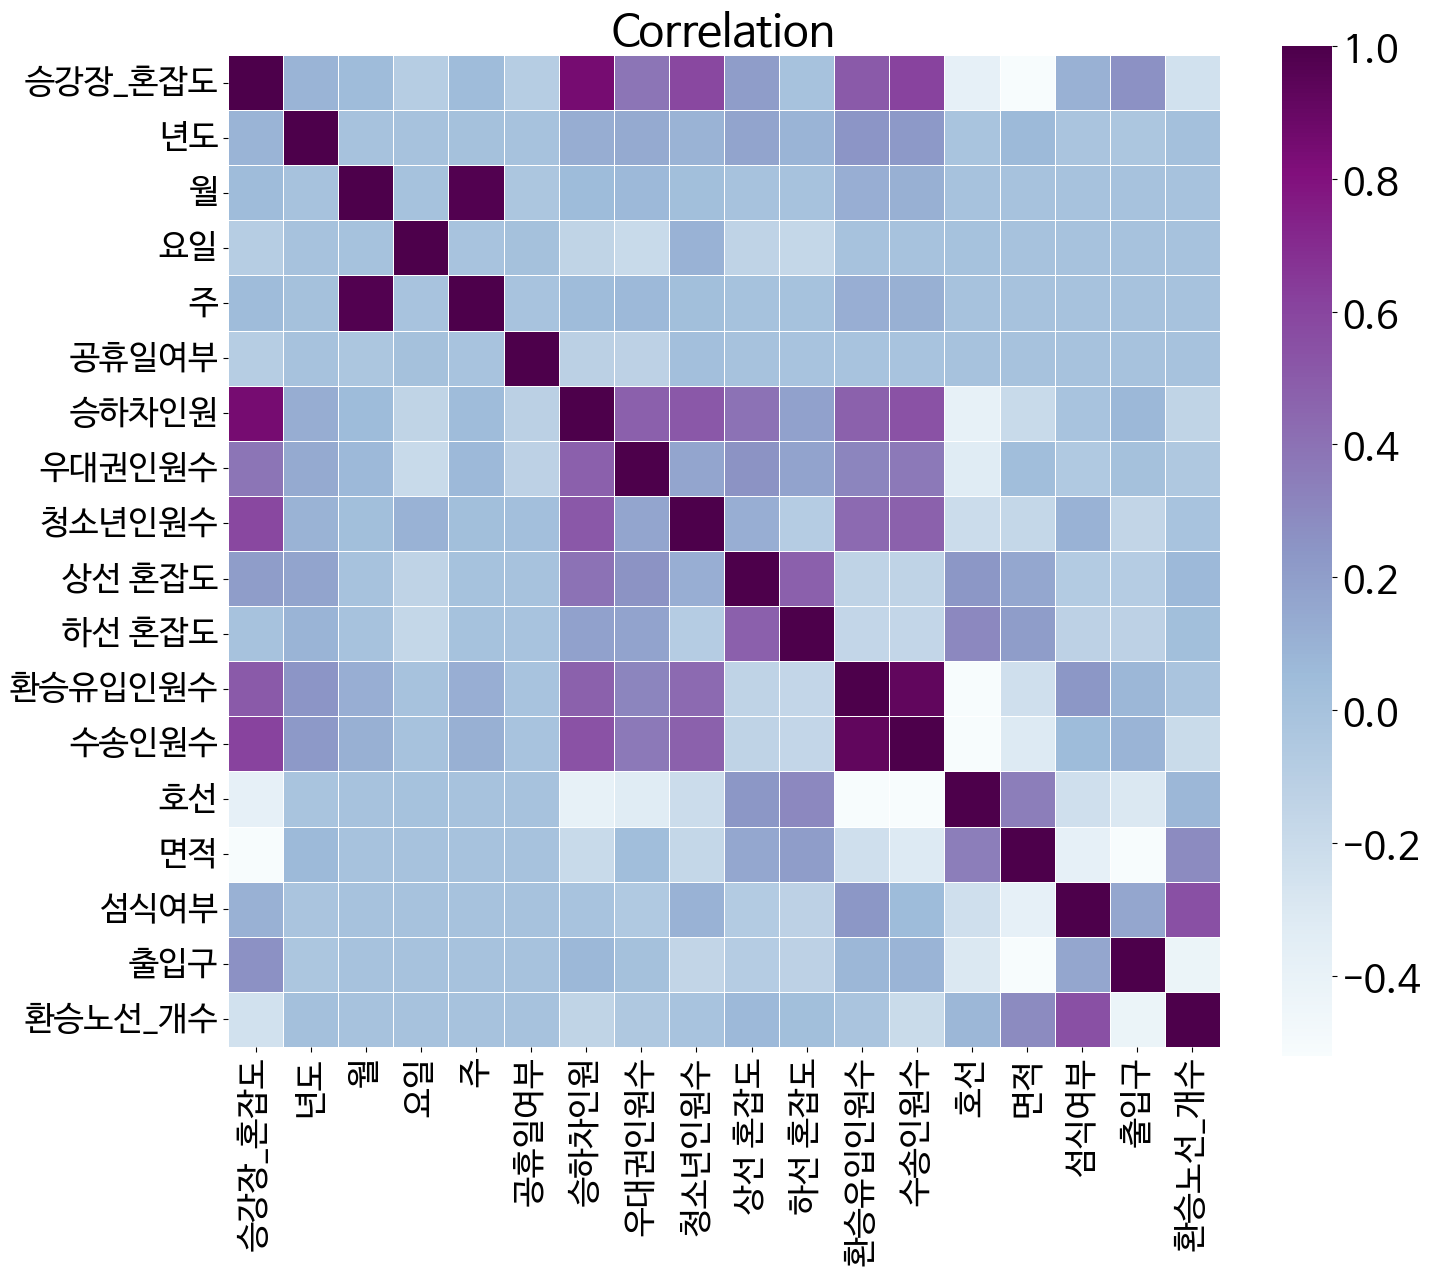

In [30]:
df_corr = df_stat[['승강장_혼잡도', '년도', '월', '요일', '주', '공휴일여부', 
         '승하차인원', '우대권인원수', '청소년인원수', '상선 혼잡도', '하선 혼잡도', '환승유입인원수', '수송인원수', 
         '호선', '면적', '섬식여부', '출입구', '환승노선_개수']].corr()
plot_heatmap(df_corr, fontsize=30, save_local=False)
plt.show()

# Descriptive

In [9]:
pd.concat([pd.concat([df_new['호선'].value_counts(), df_new['호선'].value_counts(normalize=True)], axis=1).sort_index(),
           df_new[['호선','역명']].drop_duplicates().groupby(['호선']).sum()], axis=1)

,count,proportion,역명
호선,,,
1,41610,0.0752,서울역
2,346748,0.6267,을지로입구신림신도림홍대입구선릉역삼잠실강남
3,41610,0.0752,고속터미널
4,41610,0.0752,서울역
7,41610,0.0752,고속터미널
8,40106,0.0725,잠실


In [10]:
df_new[['승강장혼잡도1']].describe().T

,count,mean,std,min,25%,50%,75%,max
승강장혼잡도1,"553,294.0000",59.9765,60.5998,0.2500,17.4044,38.1930,81.0391,502.3289


In [ ]:
# fig = px.box(df_new, x='호선', y='승강장혼잡도1', notched=True)
# fig.update_layout(width = 800, height = 500, bargap=0.1,
#                   yaxis_title='혼잡도',
#                   yaxis={'categoryorder':'total descending'},
#                   font=dict(size=16, color="black"))
# fig.show()

In [ ]:
# fig = px.box(df_new, x='역명', y='승강장혼잡도1', notched=True)
# fig.update_layout(width = 800, height = 500, bargap=0.1,
#                   yaxis_title='혼잡도', 
#                   xaxis={'categoryorder':'total descending'},
#                   font=dict(size=16, color="black"))
# fig.show()

In [ ]:
# descriptive_KK(df, target='혼잡도')

# Performance

## SCI

In [ ]:
# 데이터로딩
file_location = r'C:\DataScience\[DEBA]\Project-SubwayPrediction\Result\Performance_DataWizardd_20241114.xlsx'
df_result1 = pd.read_excel(file_location, sheet_name='승강장혼잡도(1)_기존', header=1)
# df_result1 = df_result1.set_index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
df_result2 = pd.read_excel(file_location, sheet_name='승강장혼잡도(2)_리틀', header=1)
# df_result2 = df_result2.set_index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
display(df_result1.head(), df_result2.head())

In [ ]:
df_rank = pd.DataFrame(np.zeros((7,12)))
for each1, each2 in df_result1.drop_duplicates().values:
    df_sub = df_result1[df_result1['Unnamed: 0'] == each1]
    df_sub = df_sub[df_sub['Unnamed: 1'] == each2]
#     display(table_highlight(df_sub, minmax='min', axis=0, new_index=None))
    df_rank = df_rank.add(df_sub.rank(method='min').values)
df_rank.columns = list(df_sub.columns)
df_rank.index = list(df_result1['Unnamed: 2'].unique())
display(table_highlight(df_rank.iloc[:, 5:] / 39, minmax='min', axis=0, new_index=None))

In [ ]:
df_opt = pd.DataFrame()
for algo in df_result1['Unnamed: 2'].unique():
    df_sub = df_result1[df_result1['Unnamed: 2'] == algo][['MSPE', 'MAPE', 'MedAPE']]
    df_opt = pd.concat([df_opt, df_sub.mean()], axis=1)
df_opt.columns = list(df_result1['Unnamed: 2'].unique())
df_opt.T.sort_values(by='MAPE')

## KCI

In [5]:
# 데이터로딩
# file_location = os.path.join('/mnt', 'c', 'DataScience', '[DEBA]', 'Project-SubwayPrediction(KCI)', 'Result', 'subway_result_kci.xlsx')
file_location = r'C:\DataScience\[DEBA]\[Project]\SubwayPrediction\Result\Performance_DataWizardd_KCI.xlsx'
top_stations = ['홍대입구', '강남', '서울역', '신림', '잠실', '고속터미널', '선릉', '역삼', '신도림', '을지로입구'] 
df_train = pd.read_excel(file_location, sheet_name='Train')
df_train = df_train[df_train['역명'].isin(top_stations)]
df_test = pd.read_excel(file_location, sheet_name='Test')

In [6]:
# Train
df_rank = pd.DataFrame(np.zeros((7,12)))
for each1, each2 in df_train.iloc[:,:2].drop_duplicates().values:
    df_sub = df_train[df_train['역명'] == each1]
    df_sub = df_sub[df_sub['호선'] == each2]
#     display(table_highlight(df_sub, minmax='min', axis=0, new_index=None))
    df_rank = df_rank.add(df_sub.rank(method='min').values)
df_rank.columns = list(df_sub.columns)
df_rank.index = list(df_train['알고리즘'].unique())
display(table_highlight(df_rank.iloc[:, 5:] / len(df_train.iloc[:,:2].drop_duplicates().values), minmax='min', axis=0, new_index=None))

# Test
df_rank = pd.DataFrame(np.zeros((7,12)))
for each1, each2 in df_test.iloc[:,:2].drop_duplicates().values:
    df_sub = df_test[df_test['역명'] == each1]
    df_sub = df_sub[df_sub['호선'] == each2]
#     display(table_highlight(df_sub, minmax='min', axis=0, new_index=None))
    df_rank = df_rank.add(df_sub.rank(method='min').values)
df_rank.columns = list(df_sub.columns)
df_rank.index = list(df_test['알고리즘'].unique())
display(table_highlight(df_rank.iloc[:, 5:] / len(df_test.iloc[:,:2].drop_duplicates().values), minmax='min', axis=0, new_index=None))

,MSE,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Linear Regression,6.923077,6.923077,7.000000,6.923077,7.000000,6.923077,6.923077
Random Forest,1.153846,1.153846,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,4.230769,4.230769,4.692308,4.153846,4.384615,4.461538,4.230769
LightGBM,4.923077,4.923077,4.538462,5.076923,4.923077,5.076923,5.153846
CatBoost,5.923077,5.923077,5.769231,5.846154,5.692308,5.538462,5.692308
MLP,1.846154,1.846154,2.153846,2.000000,2.000000,2.000000,2.000000
CNN,3.000000,3.000000,2.846154,3.000000,3.000000,3.000000,3.000000


,MSE,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Linear Regression,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Random Forest,1.923077,1.923077,1.000000,1.076923,1.000000,1.000000,1.000000
XGBoost,4.538462,4.538462,4.461538,4.461538,4.461538,4.461538,4.461538
LightGBM,4.538462,4.538462,4.692308,4.615385,4.538462,4.615385,4.615385
CatBoost,5.923077,5.923077,5.846154,5.923077,6.000000,5.923077,5.923077
MLP,1.384615,1.384615,2.538462,1.923077,2.307692,2.076923,2.076923
CNN,2.692308,2.692308,2.461538,3.000000,2.692308,2.923077,2.923077


In [7]:
# Train
df_opt = pd.DataFrame()
for algo in df_train['알고리즘'].unique():
    df_sub = df_train[df_train['알고리즘'] == algo][['MSPE', 'MAPE', 'MedAPE']]
    df_opt = pd.concat([df_opt, df_sub.mean()], axis=1)
df_opt.columns = list(df_train['알고리즘'].unique())
df_opt = df_opt.T.sort_values(by='MAPE')
display(df_opt)

# Test
df_opt = pd.DataFrame()
for algo in df_test['알고리즘'].unique():
    df_sub = df_test[df_test['알고리즘'] == algo][['MSPE', 'MAPE', 'MedAPE']]
    df_opt = pd.concat([df_opt, df_sub.mean()], axis=1)
df_opt.columns = list(df_test['알고리즘'].unique())
df_opt = df_opt.T.sort_values(by='MAPE')
display(df_opt)

,MSPE,MAPE,MedAPE
Random Forest,0.0000,0.0020,0.0686
MLP,0.0016,0.0145,0.7852
CNN,0.0038,0.0312,1.7671
XGBoost,0.0253,0.0894,6.0759
LightGBM,0.0211,0.0897,6.6431
CatBoost,0.0381,0.1147,8.8312
Linear Regression,0.7176,0.4336,30.8128


,MSPE,MAPE,MedAPE
Random Forest,0.0001,0.0032,0.1234
MLP,0.0017,0.0124,0.5244
CNN,0.0013,0.0137,0.6727
XGBoost,0.0091,0.0534,3.3208
LightGBM,0.0122,0.0537,3.3800
CatBoost,0.0310,0.0766,4.7205
Linear Regression,2.1766,0.5374,28.7237
